In [4]:
import pandas as pd 

real_estate_data = pd.read_csv("Real_Estate.csv")


In [5]:
real_estate_data.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [6]:
data_info = real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


### checking null values 

In [7]:
print(real_estate_data.isnull().sum())

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64


In [9]:
descriptive_stats = real_estate_data.describe()

descriptive_stats

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [11]:
real_estate_data.columns

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area'],
      dtype='object')

####  histograms of all the numerical features:

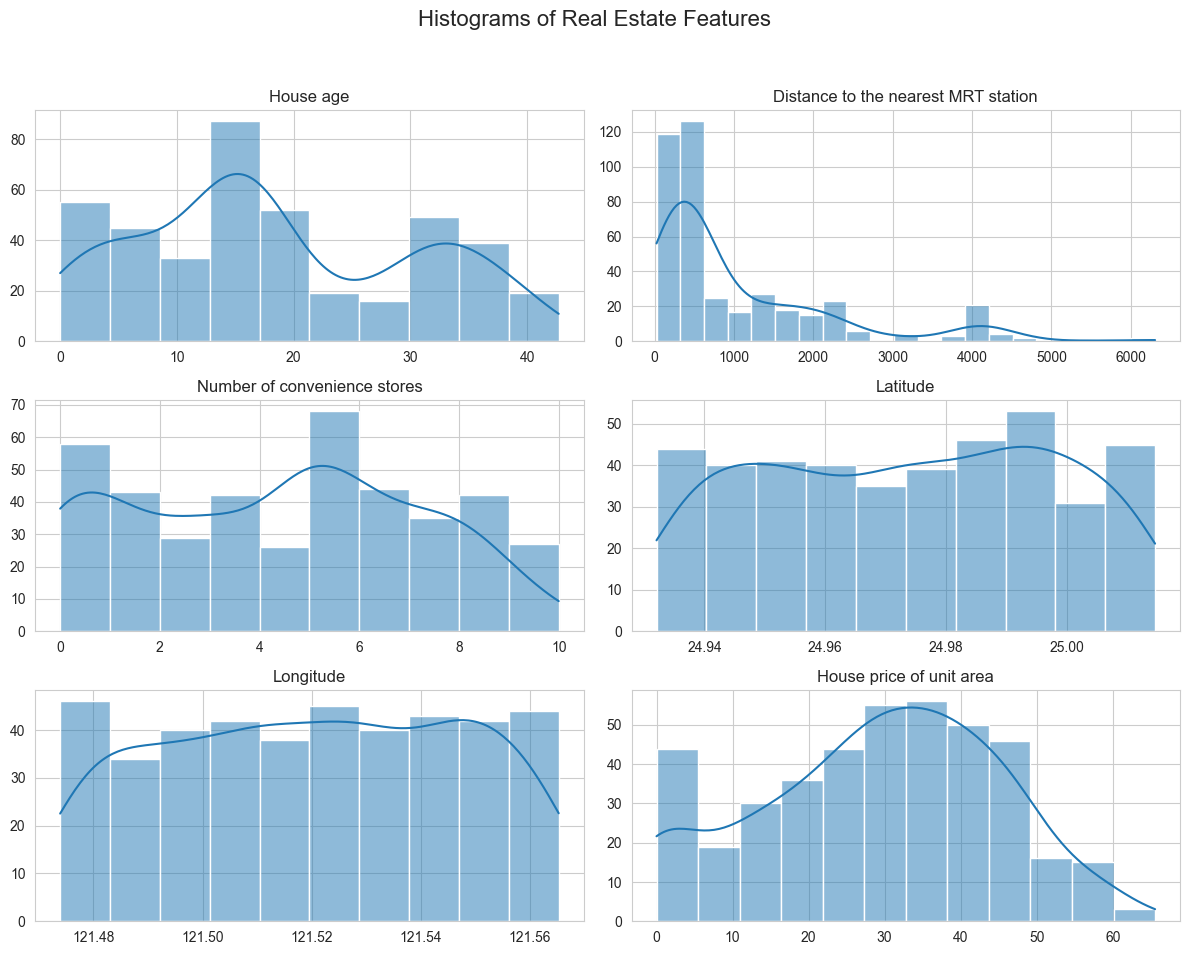

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

#set the aestetic style of the plots
sns.set_style("whitegrid")

#creating histograms for neumerical features
fig,axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.suptitle("Histograms of Real Estate Features",fontsize=16)

cols=['House age', 'Distance to the nearest MRT station','Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area']

for i,col in enumerate(cols):
    sns.histplot(real_estate_data[col],kde=True,ax=axes[i//2,i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')
    
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

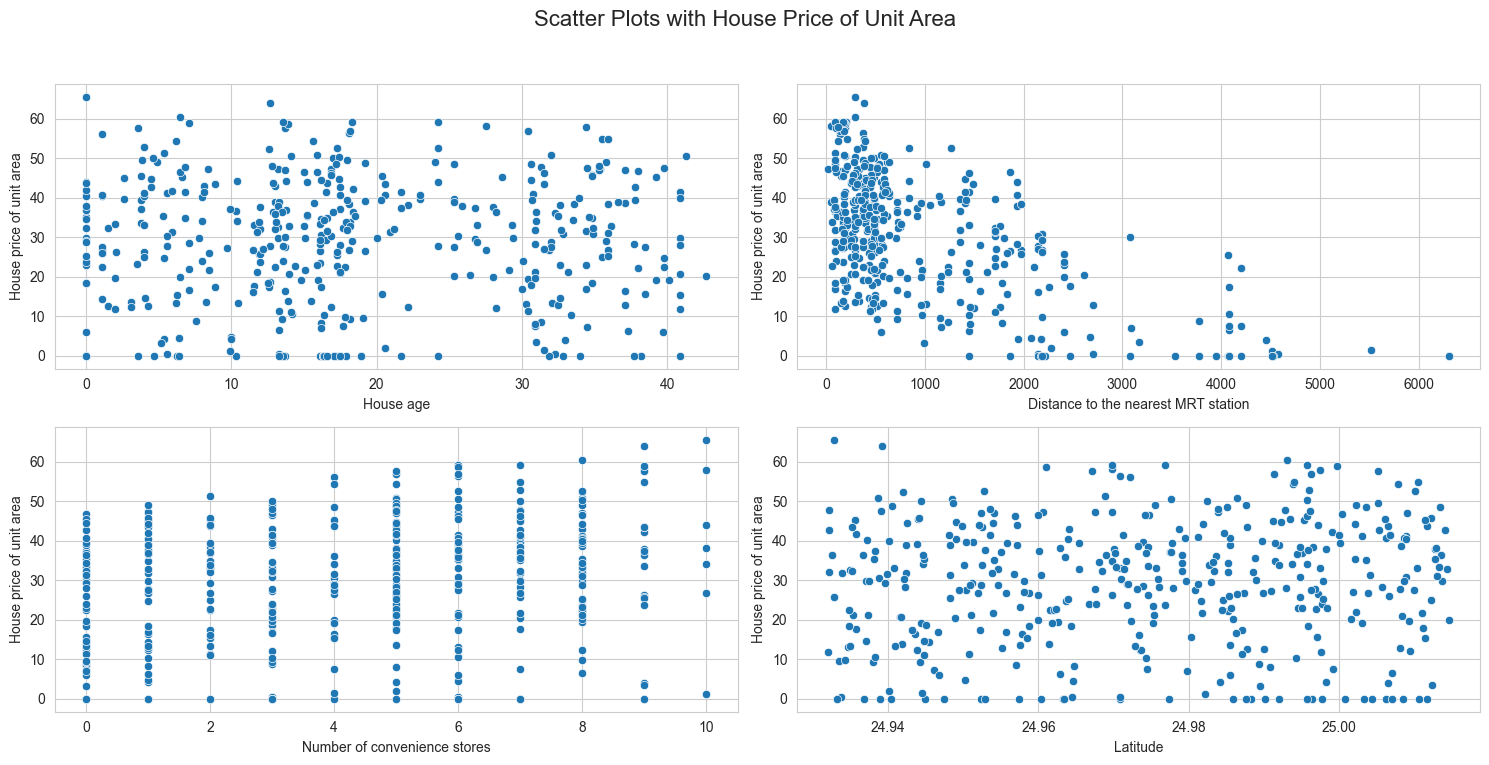

In [14]:
#scatter plots to observe the relationship with house price

fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

fig.suptitle("Scatter Plots with House Price of Unit Area", fontsize=16)    

#making scatter plots for each variable with House price of unit area   
sns.scatterplot(data = real_estate_data,x="House age",y="House price of unit area",ax=axes[0,0])
sns.scatterplot(data = real_estate_data,x="Distance to the nearest MRT station",y="House price of unit area",ax=axes[0,1])
sns.scatterplot(data = real_estate_data,x="Number of convenience stores",y="House price of unit area",ax=axes[1,0])
sns.scatterplot(data = real_estate_data,x="Latitude",y="House price of unit area",ax=axes[1,1])
plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

### correlation analysis 

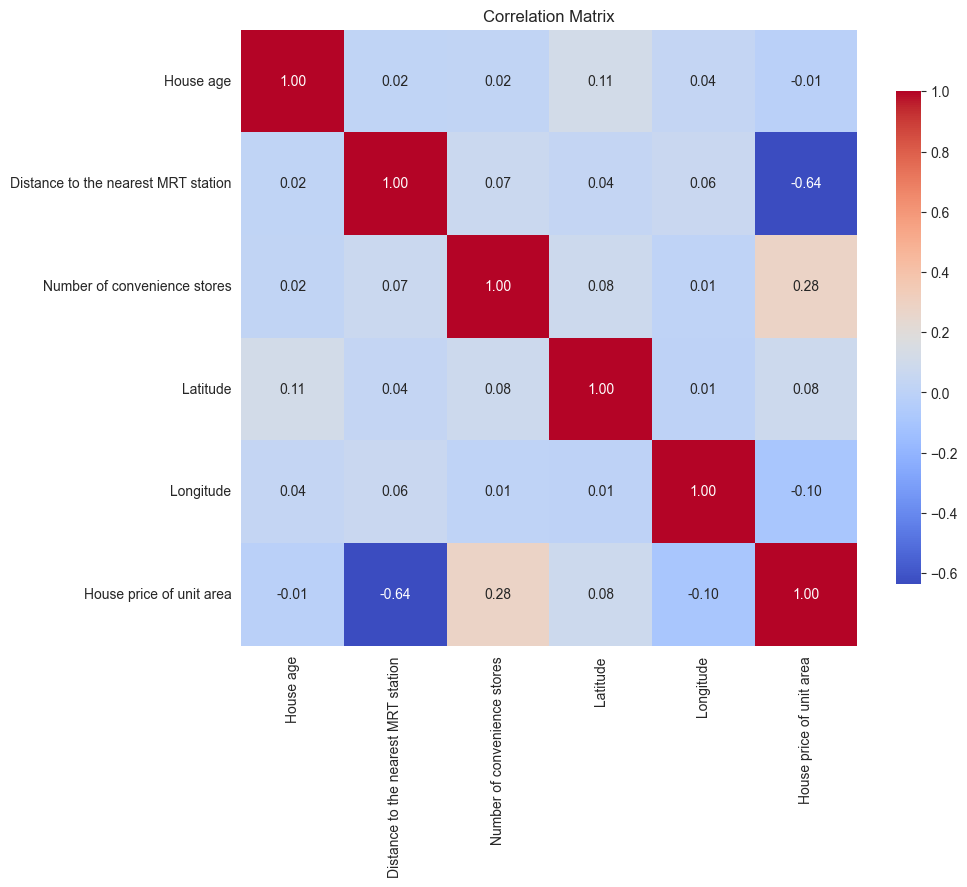

                                     House age  \
House age                             1.000000   
Distance to the nearest MRT station   0.021596   
Number of convenience stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House price of unit area             -0.012284   

                                     Distance to the nearest MRT station  \
House age                                                       0.021596   
Distance to the nearest MRT station                             1.000000   
Number of convenience stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House price of unit area                                       -0.636579   

                                     Number of convenience stores  Latitude  \
House age                            

In [17]:
correlation_matrix = real_estate_data.drop('Transaction date',axis=1).corr()

#plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix")
plt.show()

print(correlation_matrix)

##### from above correlation matrix i understood MRT station feature highly negatively correlated (more nearer to stations higher the house price ), convinence stores (moderately positive correlated, higher the stores morer the price)

#### so consideering these 2 features as input variables to predict house price , but I am including more features so that It helps to have more R square and less MAE (error)

In [30]:
real_estate_data['Distance_inverse'] = 1 / (real_estate_data['Distance to the nearest MRT station'] + 1e-6)


print(real_estate_data[['Distance to the nearest MRT station', 'Distance_inverse']].head())

   Distance to the nearest MRT station  Distance_inverse
0                            4082.0150          0.000245
1                             274.0144          0.003649
2                            1978.6710          0.000505
3                            1055.0670          0.000948
4                             967.4000          0.001034


## Model training 

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Selecting features and target variable
features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'

X = real_estate_data[features]
y = real_estate_data[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

## Making predictions using linear regression
y_pred = model.predict(X_test)
# Evaluating the model
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}") 


Mean Absolute Error: 9.52
R-squared: 0.55


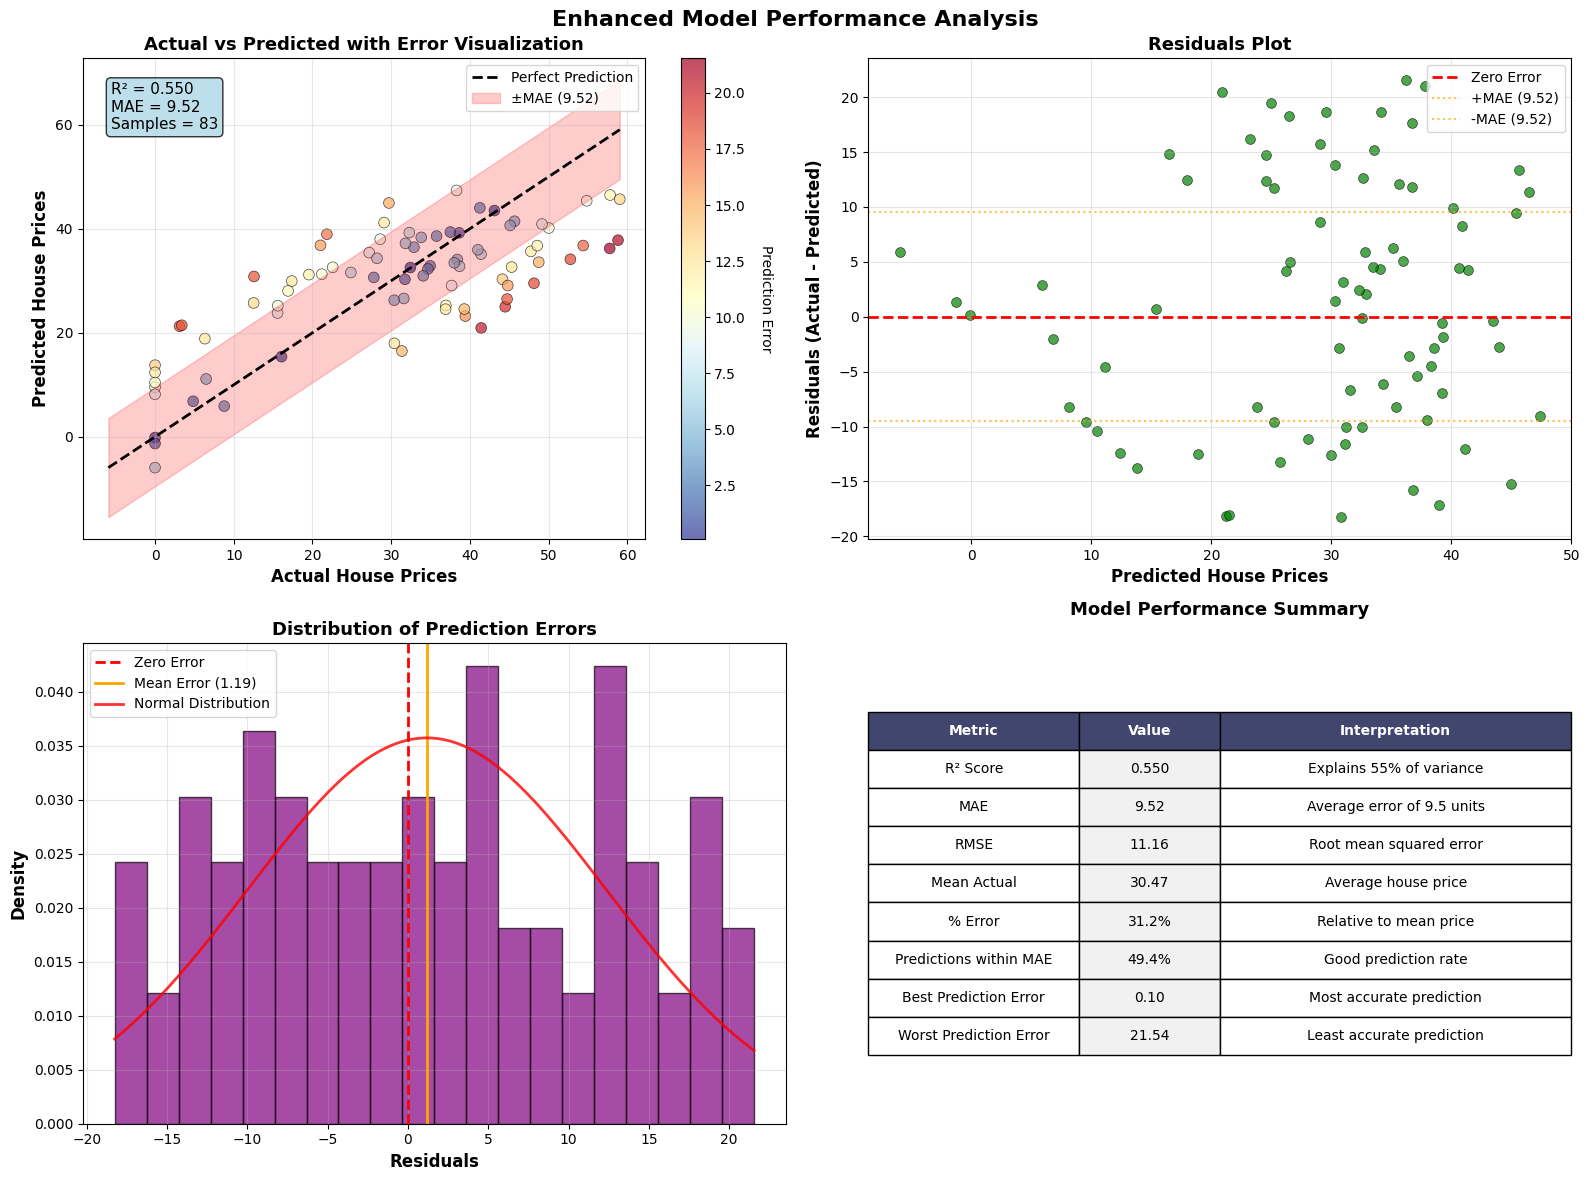

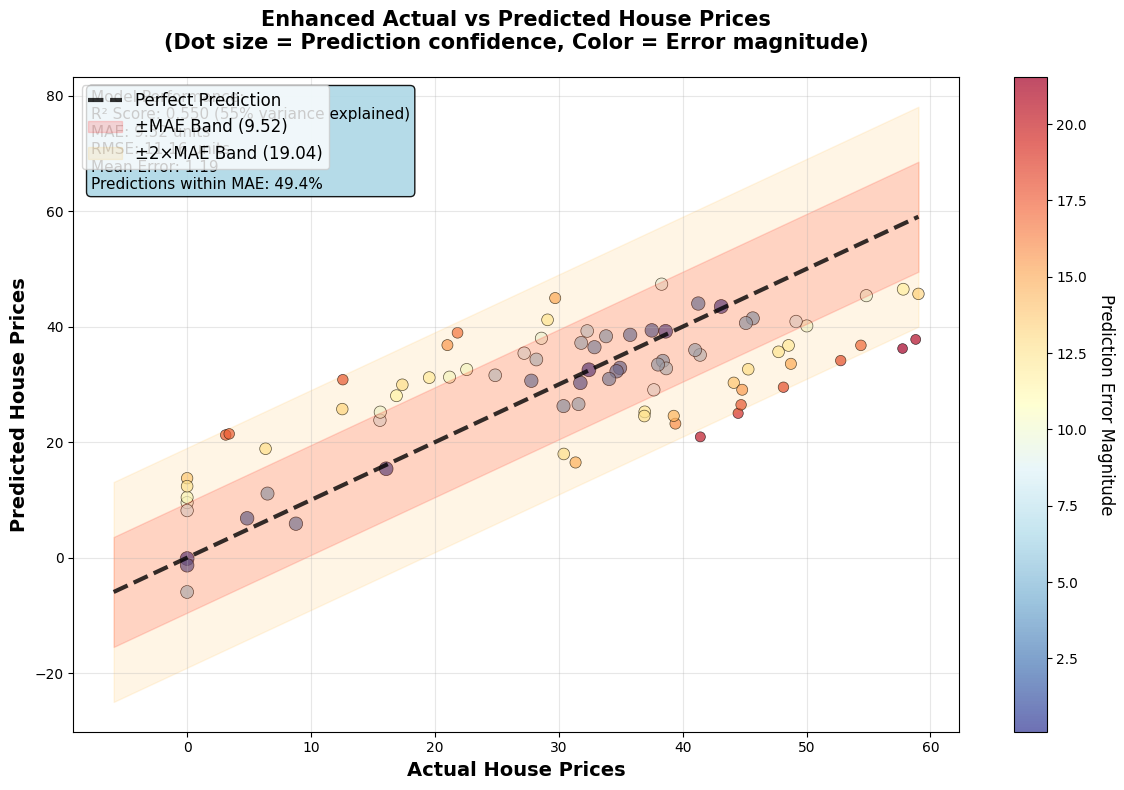

🎯 Enhanced Visualization Complete!
✅ Your model explains 55.0% of house price variation
📊 Average prediction error: 9.52 units (31.2% of mean price)
🎪 49.4% of predictions are within acceptable error range


In [32]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score

# Set style for better aesthetics
plt.style.use('default')
sns.set_palette("Set2")

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Enhanced Model Performance Analysis', fontsize=16, fontweight='bold')

# Calculate additional metrics
residuals = y_test - y_pred
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 1. Enhanced Actual vs Predicted Plot
ax1 = axes[0, 0]

# Color points based on prediction quality (residuals)
colors = np.abs(residuals)
scatter = ax1.scatter(y_test, y_pred, c=colors, cmap='RdYlBu_r', 
                     alpha=0.7, s=60, edgecolors='black', linewidth=0.5)

# Perfect prediction line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
ax1.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='Perfect Prediction')

# Confidence bands (±MAE)
ax1.fill_between([min_val, max_val], [min_val-mae, max_val-mae], 
                [min_val+mae, max_val+mae], alpha=0.2, color='red', 
                label=f'±MAE ({mae:.2f})')

# Styling
ax1.set_xlabel('Actual House Prices', fontsize=12, fontweight='bold')
ax1.set_ylabel('Predicted House Prices', fontsize=12, fontweight='bold')
ax1.set_title('Actual vs Predicted with Error Visualization', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10)

# Add R² and MAE text box
textstr = f'R² = {r2:.3f}\nMAE = {mae:.2f}\nSamples = {len(y_test)}'
props = dict(boxstyle='round', facecolor='lightblue', alpha=0.8)
ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes, fontsize=11,
         verticalalignment='top', bbox=props)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('Prediction Error', rotation=270, labelpad=20)

# 2. Residuals Plot
ax2 = axes[0, 1]
ax2.scatter(y_pred, residuals, alpha=0.7, color='green', s=50, edgecolors='black', linewidth=0.5)
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
ax2.axhline(y=mae, color='orange', linestyle=':', alpha=0.7, label=f'+MAE ({mae:.2f})')
ax2.axhline(y=-mae, color='orange', linestyle=':', alpha=0.7, label=f'-MAE ({mae:.2f})')

ax2.set_xlabel('Predicted House Prices', fontsize=12, fontweight='bold')
ax2.set_ylabel('Residuals (Actual - Predicted)', fontsize=12, fontweight='bold')
ax2.set_title('Residuals Plot', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10)

# 3. Error Distribution
ax3 = axes[1, 0]
ax3.hist(residuals, bins=20, alpha=0.7, color='purple', edgecolor='black', density=True)
ax3.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
ax3.axvline(x=residuals.mean(), color='orange', linestyle='-', linewidth=2, 
           label=f'Mean Error ({residuals.mean():.2f})')

# Overlay normal distribution for comparison
x_norm = np.linspace(residuals.min(), residuals.max(), 100)
normal_dist = (1/np.sqrt(2*np.pi*residuals.var())) * np.exp(-0.5*((x_norm-residuals.mean())/residuals.std())**2)
ax3.plot(x_norm, normal_dist, 'r-', linewidth=2, alpha=0.8, label='Normal Distribution')

ax3.set_xlabel('Residuals', fontsize=12, fontweight='bold')
ax3.set_ylabel('Density', fontsize=12, fontweight='bold')
ax3.set_title('Distribution of Prediction Errors', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend(fontsize=10)

# 4. Performance Metrics Summary
ax4 = axes[1, 1]
ax4.axis('off')

# Calculate additional metrics
mse = np.mean(residuals**2)
rmse = np.sqrt(mse)
mean_actual = y_test.mean()
percentage_error = (mae / mean_actual) * 100

# Good vs bad predictions
good_predictions = np.sum(np.abs(residuals) <= mae)
total_predictions = len(residuals)
accuracy_within_mae = (good_predictions / total_predictions) * 100

# Create metrics table
metrics_data = [
    ['Metric', 'Value', 'Interpretation'],
    ['R² Score', f'{r2:.3f}', 'Explains 55% of variance'],
    ['MAE', f'{mae:.2f}', f'Average error of {mae:.1f} units'],
    ['RMSE', f'{rmse:.2f}', f'Root mean squared error'],
    ['Mean Actual', f'{mean_actual:.2f}', 'Average house price'],
    ['% Error', f'{percentage_error:.1f}%', 'Relative to mean price'],
    ['Predictions within MAE', f'{accuracy_within_mae:.1f}%', 'Good prediction rate'],
    ['Best Prediction Error', f'{np.abs(residuals).min():.2f}', 'Most accurate prediction'],
    ['Worst Prediction Error', f'{np.abs(residuals).max():.2f}', 'Least accurate prediction']
]

# Create table
table = ax4.table(cellText=metrics_data[1:], colLabels=metrics_data[0],
                 cellLoc='center', loc='center', colWidths=[0.3, 0.2, 0.5])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Style the table
for i in range(len(metrics_data)):
    for j in range(len(metrics_data[0])):
        cell = table[i, j]
        if i == 0:  # Header row
            cell.set_facecolor('#40466e')
            cell.set_text_props(weight='bold', color='white')
        else:
            if j == 1:  # Values column
                cell.set_facecolor('#f1f1f2')
            else:
                cell.set_facecolor('white')

ax4.set_title('Model Performance Summary', fontsize=13, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# Additional single enhanced plot
plt.figure(figsize=(12, 8))

# Create scatter plot with size based on prediction confidence
sizes = 100 - (np.abs(residuals) / np.abs(residuals).max()) * 50  # Larger dots for better predictions

scatter = plt.scatter(y_test, y_pred, c=colors, s=sizes, cmap='RdYlBu_r', 
                     alpha=0.7, edgecolors='black', linewidth=0.5)

# Perfect prediction line
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=3, label='Perfect Prediction', alpha=0.8)

# Confidence intervals
plt.fill_between([min_val, max_val], [min_val-mae, max_val-mae], 
                [min_val+mae, max_val+mae], alpha=0.15, color='red', 
                label=f'±MAE Band ({mae:.2f})')

plt.fill_between([min_val, max_val], [min_val-2*mae, max_val-2*mae], 
                [min_val+2*mae, max_val+2*mae], alpha=0.1, color='orange', 
                label=f'±2×MAE Band ({2*mae:.2f})')

# Styling
plt.xlabel('Actual House Prices', fontsize=14, fontweight='bold')
plt.ylabel('Predicted House Prices', fontsize=14, fontweight='bold')
plt.title('Enhanced Actual vs Predicted House Prices\n(Dot size = Prediction confidence, Color = Error magnitude)', 
          fontsize=15, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12, loc='upper left')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Prediction Error Magnitude', rotation=270, labelpad=20, fontsize=12)

# Add performance metrics as text
textstr = f'''Model Performance:
R² Score: {r2:.3f} (55% variance explained)
MAE: {mae:.2f} units
RMSE: {rmse:.2f} units
Mean Error: {residuals.mean():.2f}
Predictions within MAE: {accuracy_within_mae:.1f}%'''

props = dict(boxstyle='round', facecolor='lightblue', alpha=0.9)
plt.text(0.02, 0.98, textstr, transform=plt.gca().transAxes, fontsize=11,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

print("🎯 Enhanced Visualization Complete!")
print(f"✅ Your model explains {r2*100:.1f}% of house price variation")
print(f"📊 Average prediction error: {mae:.2f} units ({percentage_error:.1f}% of mean price)")
print(f"🎪 {accuracy_within_mae:.1f}% of predictions are within acceptable error range")